In [77]:
# indice es el del df original,
# Arg = pbi.loc['Argenitna']
# Arg.plot()
# 1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pbi=pd.read_csv("http://bit.do/ep2020inv-pbi",index_col=0)
# pbi.plot()

In [11]:
r, c = pbi.shape
print("filas {}, columnas {}".format(r,c))
print(pbi.index,pbi.columns)

filas 193, columnas 241
Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193) Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039',
       '2040'],
      dtype='object', length=241)


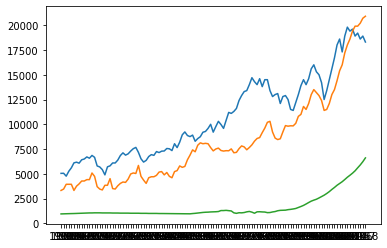

In [12]:
# 2
arg = pbi.loc['Argentina','1900':'2018']
ur = pbi.loc['Uruguay','1900':'2018']
viet = pbi.loc['Vietnam','1900':'2018']
arg1 = sns.lineplot(data=arg) # azul
ur1 = sns.lineplot(data=ur) # naranja
viet1 = sns.lineplot(data=viet) # verde

In [13]:
# 3
geo=pd.read_csv("http://bit.do/ep2020inv-geo",index_col='name')
r, c = geo.shape
print("filas {}, columnas {}".format(r,c))
print(geo.index,geo.columns)

filas 197, columnas 11
Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Palestine', 'Vietnam',
       'Yemen', 'Zambia', 'Zimbabwe', 'South Sudan'],
      dtype='object', name='name', length=197) Index(['geo', 'four_regions', 'eight_regions', 'six_regions',
       'members_oecd_g77', 'Latitude', 'Longitude', 'UN member since',
       'World bank region', 'World bank, 4 income groups 2017',
       'World bank, 3 income groups 2017'],
      dtype='object')


In [14]:
# 4
geo.groupby('four_regions').count()

geo  eight_regions  six_regions  members_oecd_g77  Latitude  \
four_regions                                                                
africa         54             54           54                53        54   
americas       35             35           35                35        35   
asia           59             59           59                59        59   
europe         49             49           49                49        49   

              Longitude  UN member since  World bank region  \
four_regions                                                  
africa               54               54                 54   
americas             35               35                 35   
asia                 59               56                 59   
europe               49               48                 48   

              World bank, 4 income groups 2017  \
four_regions                                     
africa                                      54   
americas                                    35   
asia                                        59   
europe                                      48   

              World bank, 3 income groups 2017  
four_regions                                    
africa                                       0  
americas                                     0  
asia                                         0  
europe                                       0

In [15]:
# geo.loc['Argentina','four_regions']
paises_pbi = pbi.index.tolist()
paises_geo = geo.index.tolist()
r = set(paises_pbi) & set(paises_geo)
for i in paises_geo:
    if i not in paises_pbi:
        print(i)

Holy See
Hong Kong, China
Liechtenstein
Macedonia, FYR
Taiwan


In [16]:
def agregar_region(df):
    rr = geo['four_regions'].to_frame()
    pbi2 = pbi.combine_first(rr)
    pbi2 = pbi2.rename(columns={'four_regions':'region'})
    return pbi2
pbi2 = agregar_region(pbi)

In [24]:
# 5
richest = pbi.sort_values(by=['2000'], ascending=False).head(10)
richest.index.tolist()

['Qatar',
 'United Arab Emirates',
 'Brunei',
 'Luxembourg',
 'San Marino',
 'Kuwait',
 'Norway',
 'Singapore',
 'Switzerland',
 'Monaco']

[Text(0.5, 0, 'pais'), Text(0, 0.5, 'pbi')]

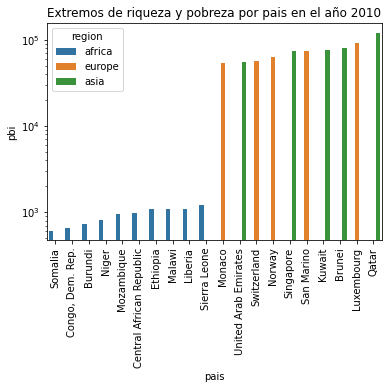

In [132]:
# 6
anio = 2010
poorest = pbi2.sort_values(by=['{}'.format(anio)]).head(10)
poorest2000 = poorest['{}'.format(anio)]

mas_pobres = poorest2000.index.tolist()
mas_ricos = richest2000.index.tolist()

extremos = mas_pobres + mas_ricos
df_extremos = pbi2[pbi2.index.isin(extremos)]
df_extremos = df_extremos.sort_values(by=['{}'.format(anio)])

# a graficar
plt.xticks(rotation=90)
charter = sns.barplot(data=df_extremos,x = df_extremos.index,y = df_extremos['{}'.format(anio)],hue = 'region')
charter.set_yscale("log")
charter.set_title('Extremos de riqueza y pobreza por pais en el año {}'.format(anio))
charter.set(xlabel='pais', ylabel='pbi')

In [156]:
# 7
def seleccionar_extremos(df, n, anio):
    richest = df.sort_values(by=['{}'.format(anio)], ascending=False).head(n)
    poorest = df.sort_values(by=['{}'.format(anio)]).head(n)
    richest_anio = richest['{}'.format(anio)]
    poorest_anio = poorest['{}'.format(anio)]

    mas_pobres = poorest_anio.index.tolist()
    mas_ricos = richest_anio.index.tolist()
    extremos = mas_pobres + mas_ricos
    
    df_extremos = df[df.index.isin(extremos)]
    df_extremos = df_extremos.sort_values(by=['{}'.format(anio)])
    return df_extremos

<AxesSubplot:xlabel='2000'>

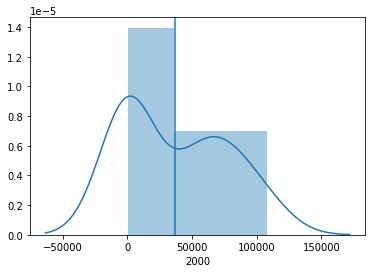

In [176]:
anio = '2000'
extr2 = seleccionar_extremos(df=pbi2, n=10, anio=anio)

promedio_pbi = extr2[anio].values.mean()

plt.axvline(promedio_pbi,)
sns.distplot(extr2[anio])
# parece bimodal con el promedio equidistante de ambos picos

In [183]:
# 9 
co2 = pd.read_csv("http://bit.do/ep2020inv-co2", index_col=0)

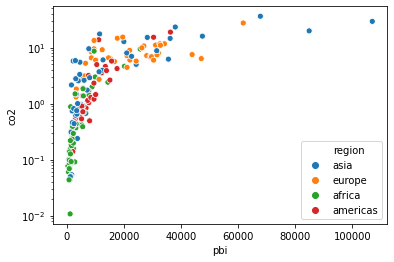

In [228]:
# 10
anio = '1991'

# incorporamos datos de co2
co2_anio = co2['{}'.format(anio)].to_frame()
co2_anio.columns = ['co2']

# incorporamos datos de pbi
pbi_anio = pbi2[['{}'.format(anio),'region']]
pbi_anio.columns = ['pbi','region']

# juntamos todo
pbi_co2_anio = pd.concat([co2_anio, pbi_anio], axis=1)

charter2 = sns.scatterplot(data=pbi_co2_anio,x = pbi_co2_anio['pbi'],y = pbi_co2_anio['co2'],hue = 'region')
charter2.set_yscale("log")


In [247]:
#12
esp_vida = pd.read_csv("http://bit.do/ep2020inv-decimales", index_col=0,decimal=",",delimiter=",")
anio = '1991'

# incorporamos datos de co2
co2_anio = co2['{}'.format(anio)].to_frame()
co2_anio.columns = ['co2']

# incorporamos datos de pbi
pbi_anio2 = pbi2[['{}'.format(anio),'region']]
pbi_anio2.columns = ['pbi','region']

# incorporamos datos de esperanza de vida
esp_vida2 = esp_vida[['{}'.format(anio)]]
esp_vida2.columns = ['esp_vida']

# juntamos todo
pbi_co2_esp_vida_anio = pd.concat([co2_anio, pbi_anio2,esp_vida2], axis=1)
pbi_co2_esp_vida_anio


co2      pbi  region  esp_vida
Afghanistan       0.183   1650.0    asia      52.4
Albania           1.310   3230.0  europe      73.0
Algeria           2.990   9930.0  africa      72.2
Andorra           7.180  28000.0  europe      79.1
Angola            0.416   4650.0  africa      48.5
...                 ...      ...     ...       ...
Hong Kong, China    NaN      NaN    asia       NaN
Macedonia, FYR      NaN      NaN  europe       NaN
Monaco              NaN  43400.0  europe       NaN
San Marino          NaN  50500.0  europe       NaN
Taiwan              NaN      NaN    asia       NaN

[198 rows x 4 columns]

In [258]:
# tomamos los datos de la pob total por pais
pob_tot = pd.read_csv("http://bit.do/ep2020inv-poblacion", index_col=0,)

pob_tot2 = pob_tot[['{}'.format(anio)]]
pob_tot2.columns = ['pob_tot']

unidos = pd.concat([pbi_co2_esp_vida_anio, pob_tot2], axis=1)

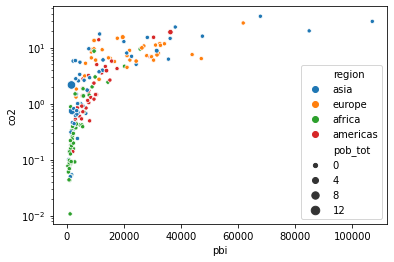

In [261]:
# 13
charter3 = sns.scatterplot(data=unidos,x = unidos['pbi'],
                           y = unidos['co2'],
                           hue = 'region',
                          size='pob_tot')
charter3.set_yscale("log")

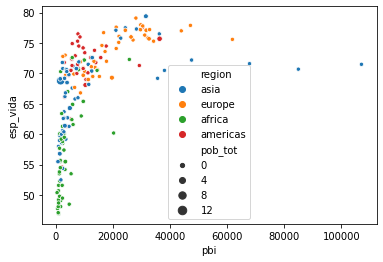

In [264]:
charter4 = sns.scatterplot(data=unidos,x = unidos['pbi'],
                           y = unidos['esp_vida'],
                           hue = 'region',
                          size='pob_tot')

In [268]:
# 14

def cuadrados_minimos(dataframe,X,Y):
    x_barra = dataframe['{}'.format(X)].mean()
    y_barra = dataframe['{}'.format(Y)].mean()
    w = ((dataframe['{}'.format(X)] - x_barra) *(dataframe['{}'.format(Y)] - y_barra)).sum()
    z = ((dataframe['{}'.format(X)] - x_barra) ** 2).sum()
    m = w/z
    b = y_barra - m*x_barra
    return m, b

m, b = cuadrados_minimos(dataframe=unidos,X='pbi',Y='co2')
m,b
# x = 156.5
# y = m*x + b
# muestra = df[(df['altura_madre']==156.5 ) & (df['genero']=='M')]
# y, muestra['altura'].mean()

(0.00030150963360131084, 0.6729533684349014)

<AxesSubplot:xlabel='pbi', ylabel='co2'>

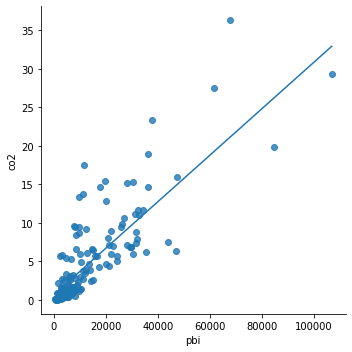

In [270]:
x = unidos['pbi'].values
sns.lmplot('pbi','co2', data=unidos, fit_reg=False)
sns.lineplot(x, m*x + b)